# Tutorial Fast Fourier Transforms (FFTs) : low and high frequencies

### Tutor: Julio C. da Silva (Néel Institute CNRS, Grenoble, France) /  email: julio-cesar.da-silva@neel.cnrs.fr
#### Personal webpage: https://sites.google.com/view/jcesardasilva

##### Disclaimer: This notebook is intended from educational reasons only and should not be use for professional data analysis. For the latter, there are other more efficient and complete codes available. 

This code run in **Python3** and requires certain python packages, which are: **Numpy, IPython, Matplotlib, Scikit-Image**

If you do not have those packages, I suggest their installation via pip install: 

    pip3 install numpy, ipython, matplotlib, scikit-image

## Playing with Fourier Transforms: low and high frequencies
In this code, we will play with the Fourier Transforms. We will find out the role of the low and the high frequencies

In [23]:
%matplotlib inline
#%matploblib notebook # uncomment this line if you want to "manipulate" the images
# standard python packages
import time

# third party packages
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure

## Preparation of the images to be Fourier transformed

In [40]:
image_data = data.camera() # cameraman 512 x 512 pixels
# to play with image of astronaut, uncomment line below:
image_data = data.astronaut().mean(axis=2) # astronaut 512 x 512 pixels. Used mean to average the 3 color channels
amp = exposure.rescale_intensity(image_data/256, out_range=(0, 1)) # normalizing amplitude
phase = exposure.rescale_intensity(image_data/256, out_range=(0, np.pi)) # normalizing phases
# Working with complex data
image_data = amp*np.exp(1j*phase)

## Performing the Fourier transform

In [41]:
# apodization of the images to avoid edge effects in the images
window = np.outer(np.hanning(image_data.shape[0]),np.hanning(image_data.shape[1]))
# direct fourier transform
fft_image_data = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(image_data)))
fft_image_data_apod = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(image_data*window)))

## Display the image and its Fourier transform

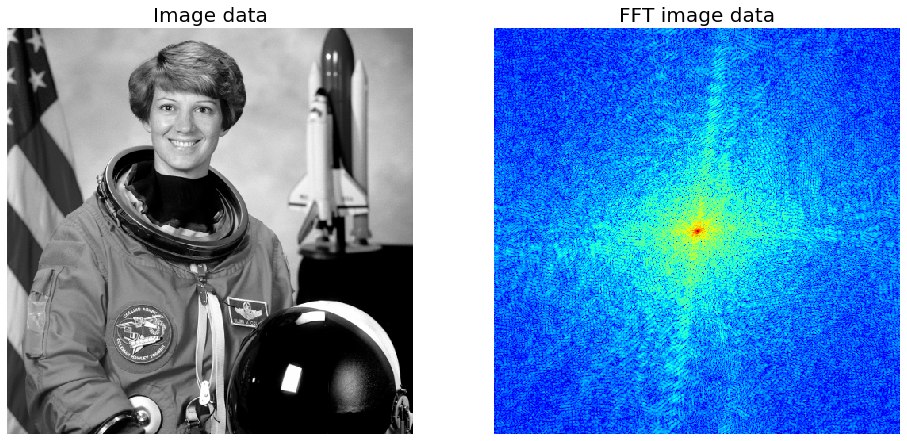

In [42]:
# display the complex images
eps = 1 # shift value to prevent zeros in the log
fig1 = plt.figure(1,figsize=(16,16))
ax11 = fig1.add_subplot(121)
ax11.imshow(np.abs(image_data),cmap='gray') # amplitude
ax11.set_title('Image data',fontsize = 20)
plt.axis('off')
ax12 = fig1.add_subplot(122)
ax12.imshow(np.log(np.abs(fft_image_data_apod)+eps),cmap='jet') # amplitude
ax12.set_title('FFT image data',fontsize = 20)
plt.axis('off')
plt.show(block=False)

## Let's invert the Fourier transforms, but blocking low frequencies
First, let's create a mask

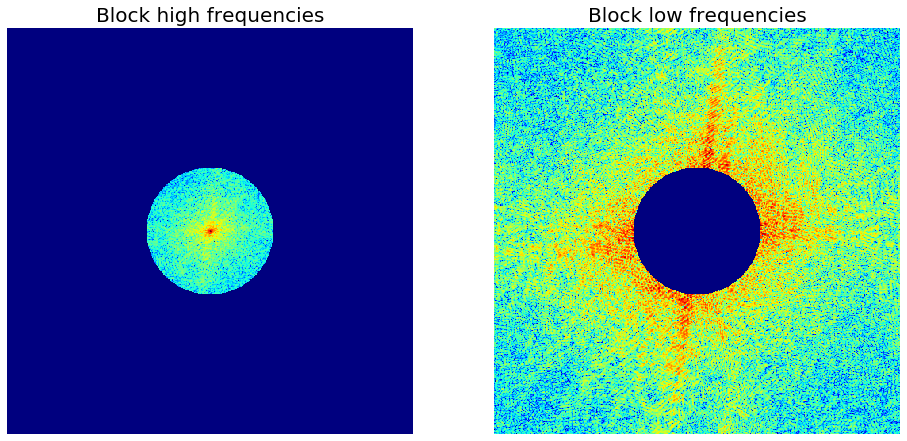

In [51]:
#-----------------
# Edit mask radius
#-----------------
mradius = 80
#-----------------
X,Y = np.indices(np.abs(fft_image_data_apod).shape).astype(np.float32)-255.5 # shift to the center
mask_lowfreq = (X**2+Y**2)<mradius**2
mask_highfreq = ~mask_lowfreq
# applying masks
maskedfftimg_low = mask_lowfreq*np.log(np.abs(fft_image_data_apod)+eps)
maskedfftimg_high = mask_highfreq*np.log(np.abs(fft_image_data_apod)+eps)

# displaying masks
fig2 = plt.figure(2,figsize=(16,16))
ax21 = fig2.add_subplot(121)
ax21.imshow(maskedfftimg_low,cmap='jet')
ax21.set_title('Block high frequencies',fontsize = 20)
plt.axis('off')
ax22 = fig2.add_subplot(122)
ax22.imshow(maskedfftimg_high, cmap='jet')
ax22.set_title('Block low frequencies',fontsize = 20)
plt.axis('off')
plt.show(block=False)

## Let's now calculate the inverse Fourier transform and display the results

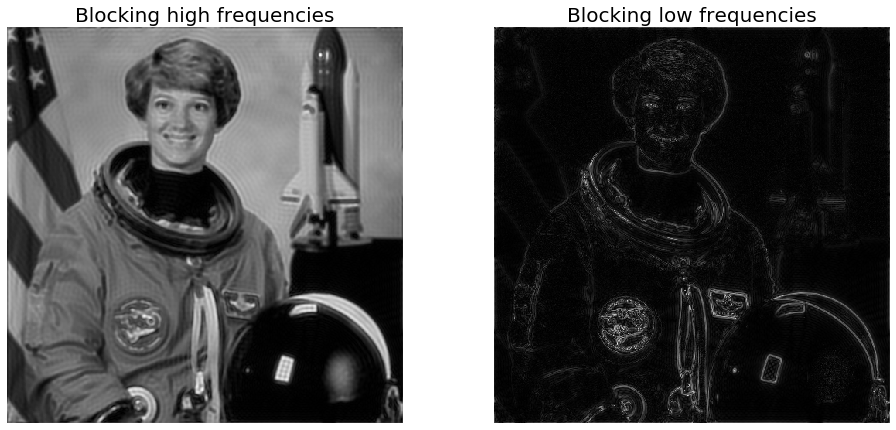

In [52]:
image_data_low = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fft_image_data*mask_lowfreq)))
image_data_high = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fft_image_data*mask_highfreq)))
# display the complex images
fig3 = plt.figure(3,figsize=(16,16))
ax31 = fig3.add_subplot(221)
ax31.imshow(np.abs(image_data_low),cmap='gray') # amplitude
ax31.set_title('Blocking high frequencies',fontsize = 20)
plt.axis('off')
ax32 = fig3.add_subplot(222)
ax32.imshow(np.abs(image_data_high),cmap='gray') # phase
ax32.set_title('Blocking low frequencies',fontsize = 20)
plt.axis('off')
plt.show(block=False)